<a href="https://colab.research.google.com/github/Gocoderunav/Diffusion_Equation-_PINNS/blob/main/Diffusion_Eq_PINN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.1 MB/s eta 0:00:00


In [4]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf

In [6]:
def pde(x,y):
    dy_t =dde.grad( y , x ,j=1)
    dy_xx =dde.hessian( y ,x, j=0)

    return (dy_t -dy_xx + tf.exp(-x[:,1:] ) * (tf.sin(np.pi *X[:,0:1]) -np.pi**2 *tf.sin(np.pi* x[:,0:1])))


In [7]:
def func(x):
    return np.sin(np.pi*x[:,0:1]) * np.exp(-x[: ,1 :])



In [15]:
geom = dde.geometry.Interval(-1,1)
timedomain =dde.geometry.TimeDomain(0,1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [17]:
bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic =dde.IC ( geomtime , func ,lambda _ ,on_initial : on_initial)
data = dde.data.TimePDE( geomtime ,pde, [bc,ic] ,num_domain= 40, num_boundary =20, num_initial =10 ,solution =func ,num_test =10000,)

In [18]:
layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

In [19]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.087079 s

'compile' took 0.853648 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [1.61e+01, 3.46e-02, 5.92e-01]    [1.70e+01, 3.46e-02, 5.92e-01]    [1.18e+00]    
1000      [1.95e-03, 2.33e-03, 8.99e-04]    [3.35e-03, 2.33e-03, 8.99e-04]    [6.47e-02]    
2000      [5.05e-04, 4.92e-04, 2.61e-04]    [1.08e-03, 4.92e-04, 2.61e-04]    [2.99e-02]    
3000      [3.28e-04, 8.63e-05, 6.07e-05]    [7.17e-04, 8.63e-05, 6.07e-05]    [1.22e-02]    
4000      [1.69e-04, 1.57e-05, 1.39e-05]    [4.18e-04, 1.57e-05, 1.39e-05]    [5.64e-03]    
5000      [1.14e-03, 3.59e-05, 2.42e-05]    [1.09e-03, 3.59e-05, 2.42e-05]    [8.54e-03]    
6000      [6.05e-05, 5.76e-06, 2.87e-06]    [1.97e-04, 5.76e-06, 2.87e-06]    [4.06e-03]    
7000      [4.72e-05, 6.11e-06, 2.06e-06]    [1.53e-04, 6.11e-06, 2.06e-06]    [4.10e-03]    
8000      [4.92e-05, 6.04e-06, 2.

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


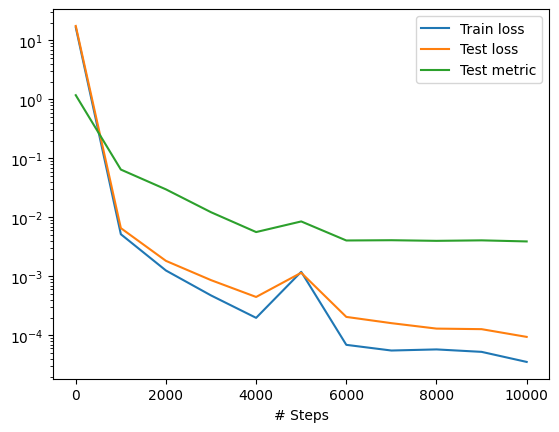

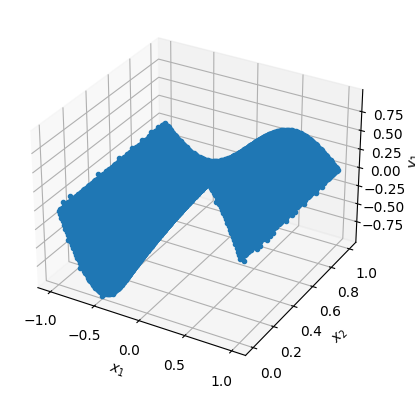

In [20]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)